In [75]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import metrics

import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('/Users/suvodeepmajumder/Documents/AI4SE/refactor_miner/results/understand/ant.csv')

In [86]:
df1 = df[df['Refactoring_type'].isin([#'Move Attribute',
                                      'Extract And Move Method',
                                      #'Extract Method',
                                      #'Move Class',
                                      #'Move Method',
                                      #'Pull Up Attribute',
                                      #'Pull Up Method',
                                      #'Push Down Attribute',
                                      #'Rename Method',
                                      #'Push Down Method'
                                     ])]

In [87]:
df.groupby(['Name','Commit_hash','Refactoring_type']).count()

AvgCyclomatic  \
Name                                               Commit_hash                              Refactoring_type                         
AssertionMain                                      14d5a4009a398c3b64fe9a313f4c0670d75ae0bf Move Method                          1   
AssertionTest                                      14d5a4009a398c3b64fe9a313f4c0670d75ae0bf Move Method                          1   
Bootstrap                                          4cd7d60e99d2dbbea019824a0ac731c2ae341d1f Extract Method                       1   
                                                                                            Move Attribute                       1   
Bootstrap2                                         4cd7d60e99d2dbbea019824a0ac731c2ae341d1f Move Attribute                       1   
org.apache.ant.Ant                                 f85678f1abd081bfd165ce81b94bad652968e4fd Move Attribute                       1   
org.apache.ant.AntException                        6f3f9cca3e46d9b295f612635ddc47d887d760ce Move Class                           3   
org.apache.ant.DefaultAntEngine                    8c97911720b40557d78672245bc2e7f724917297 Move Attribute                       1   
                                                   a00fa243becff6d062b1e9491d7cada4c552c3ba Move Class                           1   
org.apache.ant.Main                                6f3f9cca3e46d9b295f612635ddc47d887d760ce Move Class                           1   
                                                   8c97911720b40557d78672245bc2e7f724917297 Inline Method                        1   
                                                                                            Move Attribute                       1   
                                                   9ab12cf5788110dca87caccb6fb6067fe1d37c1e Move Attribute                       1   
                                                   ab5d2d667652fc27a6965c50a9d0bc5d06035497 Extract Method                       2   
                                                   ce225a0e46c3cb76bd99b45b24c5da3b7f126ed0 Rename Method                        2   
org.apache.ant.Project                             f85678f1abd081bfd165ce81b94bad652968e4fd Move Attribute                       1   
                                                                                            Rename Method                        1   
org.apache.ant.TaskManager                         f85678f1abd081bfd165ce81b94bad652968e4fd Move Attribute                       1   
org.apache.ant.antcore.antlib.AntLibHandler        829d306c72a2e58b0a3b67d27c0dd05aca0855a5 Rename Method                        2   
org.apache.ant.antcore.antlib.AntLibManager        30b81779b563d12a1e28bebf934d5a5626da57ce Rename Method                        2   
                                                   4d8702d1f414ef88110183568a3aa502d18e06f1 Extract Method                       2   
                                                   b7e43ad8c5906ae2b6d6b42f8b2715dc7d2e7a16 Move Method                          1   
                                                   f9d1c1691c7e9d80b793f5178f6113c949fc2441 Inline Method                        1   
                                                                                            Move Attribute                       1   
org.apache.ant.antcore.antlib.AntLibrary           8e684f3e6e608fb3d36212faea4c1c7ad80f4323 Pull Up Attribute                    1   
org.apache.ant.antcore.antlib.AntLibrarySpec       b7e43ad8c5906ae2b6d6b42f8b2715dc7d2e7a16 Rename Method                        2   
org.apache.ant.antcore.antlib.ClassNameHandler     b7e43ad8c5906ae2b6d6b42f8b2715dc7d2e7a16 Rename Class                         1   
org.apache.ant.antcore.antlib.ConverterHandler     b7e43ad8c5906ae2b6d6b42f8b2715dc7d2e7a16 Rename Class                         1   
org.apache.ant.antcore.config.AntConfig            b7e43ad8c5906ae2b6d6b42f8b2715dc7d2e7a16 Renam

In [62]:
x = df1[(df1['Commit_hash'] == '048caece4061746150290b0264128118a4be3870')]                                                                          

In [63]:
y = x[x['Name'] == 'org.apache.tools.ant.IntrospectionHelper']
y = y.drop(labels=['Name','Type','Refactored','Refactoring_type','Commit_hash'],axis=1)

In [64]:
y.diff(periods=-1)

,AvgCyclomatic,AvgCyclomaticModified,AvgCyclomaticStrict,AvgEssential,AvgLine,AvgLineBlank,AvgLineCode,AvgLineComment,CountClassBase,CountClassCoupled,...,MaxEssential,MaxInheritanceTree,MaxNesting,PercentLackOfCohesion,PercentLackOfCohesionModified,RatioCommentToCode,SumCyclomatic,SumCyclomaticModified,SumCyclomaticStrict,SumEssential


In [65]:
df1 = df1.drop(labels=['Name','Type','Refactored','Refactoring_type','Commit_hash'],axis=1)
df2 = df2.drop(labels=['Name','Type','Refactored','Refactoring_type','Commit_hash'],axis=1)

In [66]:
df1 = df1.diff(periods=1)
df2 = df2.diff(periods=1)
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [67]:
df1['type'] = [1]*df1.shape[0]
df2['type'] = [0]*df2.shape[0]

In [68]:
df_f = pd.concat([df1,df2])

In [69]:
y = df_f.type
X = df_f.drop(labels=['type'],axis=1)
train_X,test_X,train_y,test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
clf = LogisticRegression(penalty='l1',class_weight='balanced')
clf.fit(train_X,train_y)
predicted = clf.predict(test_X)
fpr, tpr, thresholds = metrics.roc_curve(test_y, predicted, pos_label=1)
print(metrics.auc(fpr, tpr))
print(classification_report(test_y, predicted))
print(clf.coef_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4406678391053391
              precision    recall  f1-score   support

           0       0.42      0.54      0.47       396
           1       0.46      0.35      0.39       448

   micro avg       0.43      0.43      0.43       844
   macro avg       0.44      0.44      0.43       844
weighted avg       0.44      0.43      0.43       844

[[ 0.          0.03987723 -0.02464737 -0.09788465  0.03210062 -0.07017719
  -0.02212539 -0.06482516 -0.03153353 -0.00046816  0.0036053  -0.00575454
   0.01088594  0.         -0.00522465 -0.00272226  0.00070613  0.01663294
  -0.01988894 -0.0169155   0.          0.01046304 -0.01071759 -0.01101538
   0.0018665  -0.00012318 -0.00930645  0.003075   -0.00051013 -0.00616988
   0.          0.02931869 -0.02935989 -0.00133755  0.01679697 -0.01601976
   0.01553429  0.00099268 -0.00190737  0.          0.          0.01886171
  -0.01490401 -0.00065333]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


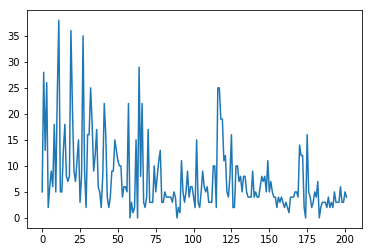

In [84]:
plt.plot(df1.CountClassCoupled.values)